# Cleaning and Visualizing the Penguins Dataset
This notebook demonstrates how to clean a dataset by handling missing values and then visualize the cleaned data using various plots. The dataset used here is the 'penguins' dataset from Seaborn.

## 1. Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
# Importing essential libraries for data manipulation and visualization.

## 2. Loading the Dataset

In [2]:
df = sns.load_dataset('penguins')
df
# Loading the 'penguins' dataset from Seaborn and displaying the first few rows.

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## 3. Handling Missing Values

In [3]:
df.isnull().sum()
# Counting the missing values in each column of the dataset.

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
penguins_cleaned = df.copy()
# Creating a copy of the dataset to avoid modifying the original data.

In [5]:
# Filling missing values in the 'sex' column using the mode (most frequent value)
penguins_cleaned['sex'].fillna(penguins_cleaned['sex'].mode()[0], inplace=True)
# Filling missing values in numerical columns using the mean
penguins_cleaned['bill_depth_mm'].fillna(penguins_cleaned['bill_depth_mm'].mean(), inplace=True)
penguins_cleaned['flipper_length_mm'].fillna(penguins_cleaned['flipper_length_mm'].mean(), inplace=True)
penguins_cleaned['body_mass_g'].fillna(penguins_cleaned['body_mass_g'].mean(), inplace=True)
penguins_cleaned['bill_length_mm'].fillna(penguins_cleaned['bill_length_mm'].mean(), inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_2884\936470956.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguins_cleaned['sex'].fillna(penguins_cleaned['sex'].mode()[0], inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2884\936470956.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [6]:
penguins_cleaned.isnull().sum()
# Checking to ensure all missing values have been filled.

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## 4. Exporting the Cleaned Data

In [7]:
penguins_cleaned.to_excel('penguins_cleaned.xlsx', index=False)
print('Cleaned dataset exported successfully!')
# Exporting the cleaned dataset to an Excel file.

Cleaned dataset exported successfully!


## 5. Data Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Importing Matplotlib for additional customization of plots.

### 5.1. Count Plot - Species by Sex

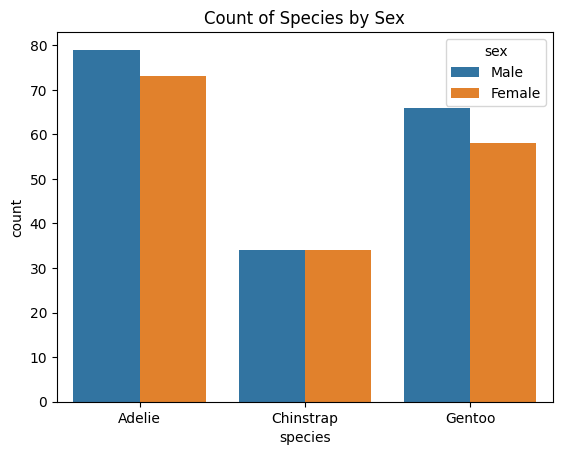

In [9]:
sns.countplot(x='species', hue='sex', data=penguins_cleaned)
plt.title('Count of Species by Sex')
plt.show()
# A count plot to show the distribution of species by sex.

### 5.2. Violin Plot - Distribution of Flipper Length by Species

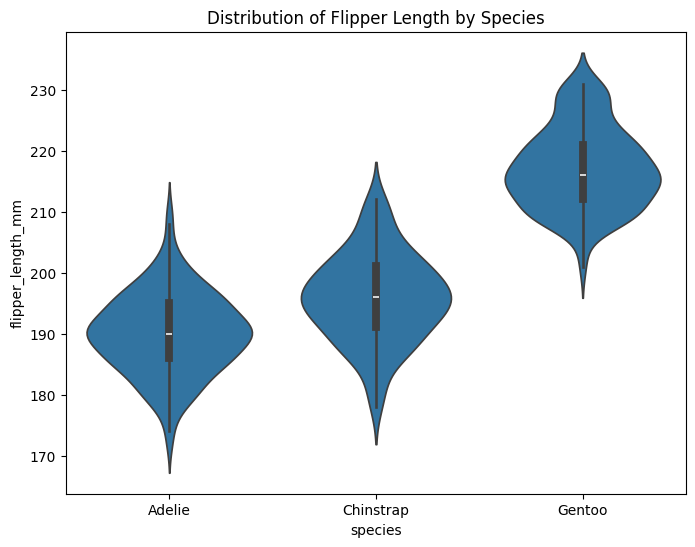

In [10]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='species', y='flipper_length_mm', data=penguins_cleaned)
plt.title('Distribution of Flipper Length by Species')
plt.show()
# A violin plot to visualize the distribution of flipper length across different species.

### 5.3. Scatter Plot - Bill Length vs. Bill Depth

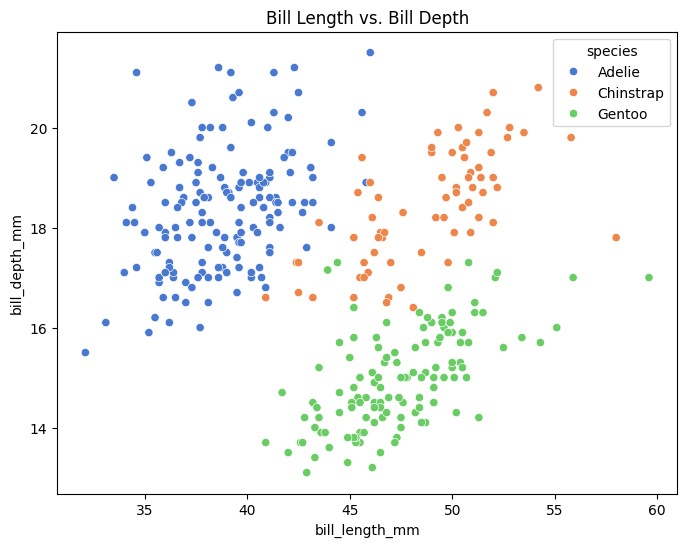

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=penguins_cleaned, palette='muted')
plt.title('Bill Length vs. Bill Depth')
plt.show()
# A scatter plot to explore the relationship between bill length and bill depth, colored by species.

### 5.4. Pairplot - Relationships between Numerical Variables

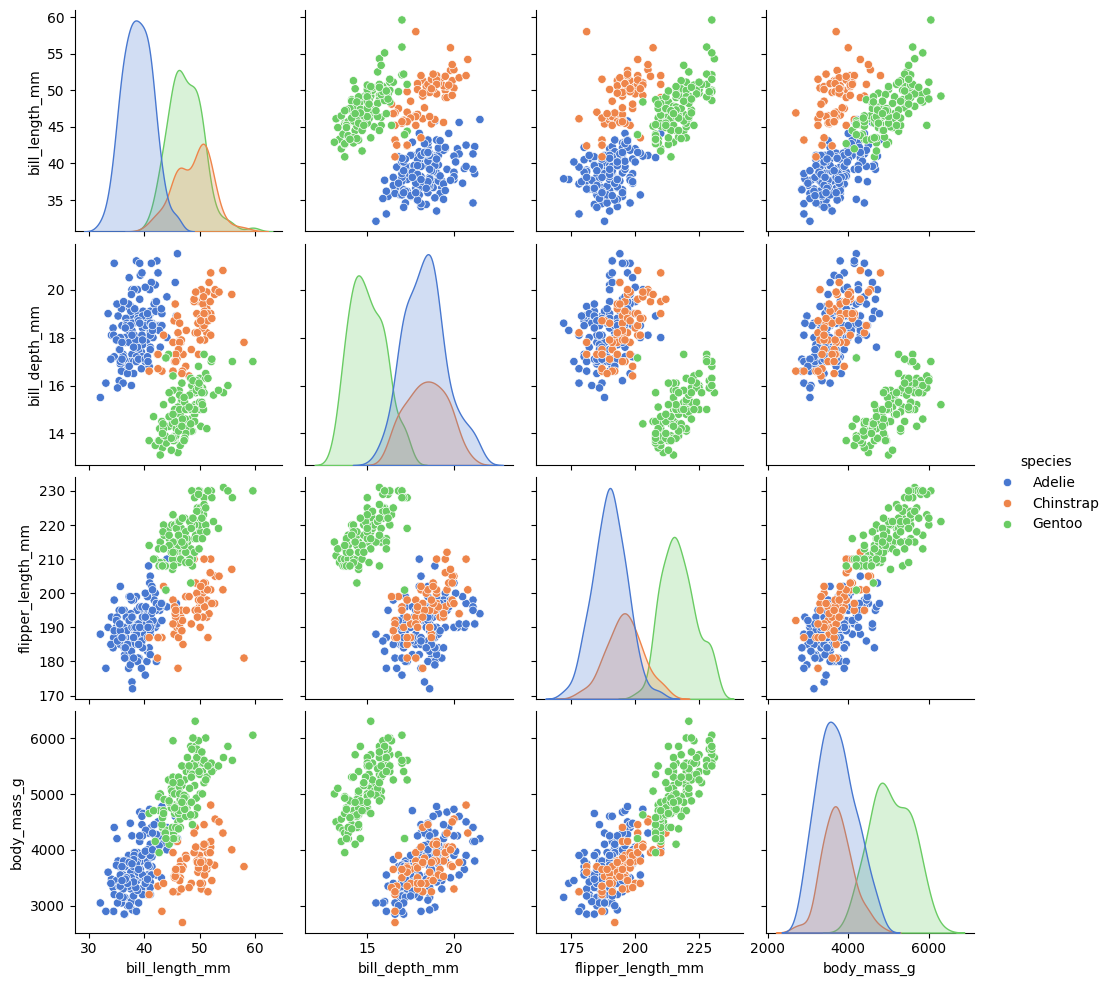

In [12]:
sns.pairplot(penguins_cleaned, hue='species', palette='muted')
plt.show()
# A pairplot to visualize relationships between all numerical variables in the dataset, differentiated by species.